In [2]:
import zipfile
with zipfile.ZipFile("Smart.zip" ,"r") as zip_ref:
    zip_ref.extractall()

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('smartwatches.csv')

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
train_df = df .copy()

In [7]:
df.shape, train_df.shape

((450, 16), (450, 16))

In [8]:
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [9]:
 #1. Unnamed: 0 remove

In [10]:
#train_df = df.sample(frac = 0.8, random_state = 42)

In [11]:
train_df = train_df.reset_index()

In [12]:
#test_df = df.drop(train_df.index)

In [13]:
#test_df = test_df.reset_index()

In [14]:
#print(train_df.shape, test_df.shape)

In [15]:
train_df.tail()

index  Unnamed: 0       Brand  Current Price  Original Price  \
445    445         445  fire-boltt         5999.0          8999.0   
446    446         446  fire-boltt         3700.0          9999.0   
447    447         447  fire-boltt         5999.0          8999.0   
448    448         448  fire-boltt         3200.0          7999.0   
449    449         449  fire-boltt         3000.0          7999.0   

     Discount Percentage  Rating  Number OF Ratings Model Name Dial Shape  \
445            33.337037     2.5                NaN     bsw003     Circle   
446            62.996300     NaN                NaN  beast pro     Square   
447            33.337037     2.5                NaN     bsw003     Circle   
448            59.994999     NaN                NaN     call 2     Square   
449            62.495312     NaN                NaN     call 2     Square   

    Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
445        Grey        Silicon         Yes                 22.0       Yes   
446       Black        Silicon         Yes                  8.0       Yes   
447        Gold        Silicon         Yes                 22.0       Yes   
448        Blue        Silicon         Yes                 22.0       Yes   
449       Black        Silicon         Yes                 22.0       Yes   

    Display Size Weight  
445   1.3 inches    NaN  
446   0.1 inches    NaN  
447   1.3 inches    NaN  
448   0.1 inches    NaN  
449   0.1 inches    NaN

In [16]:
train_df.dtypes

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [17]:
train_df.isna().sum()

index                    0
Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [18]:
# null value

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                450 non-null    int64  
 1   Unnamed: 0           450 non-null    int64  
 2   Brand                450 non-null    object 
 3   Current Price        440 non-null    float64
 4   Original Price       377 non-null    float64
 5   Discount Percentage  377 non-null    float64
 6   Rating               444 non-null    float64
 7   Number OF Ratings    391 non-null    float64
 8   Model Name           415 non-null    object 
 9   Dial Shape           327 non-null    object 
 10  Strap Color          327 non-null    object 
 11  Strap Material       381 non-null    object 
 12  Touchscreen          413 non-null    object 
 13  Battery Life (Days)  418 non-null    float64
 14  Bluetooth            444 non-null    object 
 15  Display Size         420 non-null    obj

In [20]:
numerical_data = [feature for feature in  train_df.columns if train_df[feature].dtype != "object"]

In [21]:
continuous_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [22]:
numerical_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [23]:
continuous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [24]:
train_df[numerical_data].describe()

index  Unnamed: 0  Current Price  Original Price  \
count  450.000000  450.000000     440.000000      377.000000   
mean   224.500000  224.500000   12747.554545    14598.204244   
std    130.048068  130.048068   17760.666099    15450.028869   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    112.250000  112.250000    2180.750000     5999.000000   
50%    224.500000  224.500000    3999.000000     7999.000000   
75%    336.750000  336.750000   17121.750000    17999.000000   
max    449.000000  449.000000  139990.000000    96390.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           377.000000  444.000000         391.000000           418.000000  
mean             48.236894    4.031306       11594.726343            14.077392  
std              24.109830    0.550548       40423.889227             7.718503  
min             -79.688436    1.000000           1.000000             0.750000  
25%              33.337037    3.900000          68.500000             8.000000  
50%              54.550414    4.100000         996.000000            17.500000  
75%              66.677780    4.300000        6022.000000            22.000000  
max              91.004550    5.000000      619130.000000            22.000000

In [25]:
train_df[numerical_data].corr()

index  Unnamed: 0  Current Price  Original Price  \
index                1.000000    1.000000      -0.082605       -0.079370   
Unnamed: 0           1.000000    1.000000      -0.082605       -0.079370   
Current Price       -0.082605   -0.082605       1.000000        0.970261   
Original Price      -0.079370   -0.079370       0.970261        1.000000   
Discount Percentage -0.092257   -0.092257      -0.627595       -0.508600   
Rating              -0.263381   -0.263381       0.394447        0.332426   
Number OF Ratings   -0.130883   -0.130883      -0.142049       -0.136846   
Battery Life (Days)  0.353799    0.353799       0.025192       -0.122888   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.092257 -0.263381          -0.130883   
Unnamed: 0                     -0.092257 -0.263381          -0.130883   
Current Price                  -0.627595  0.394447          -0.142049   
Original Price                 -0.508600  0.332426          -0.136846   
Discount Percentage             1.000000 -0.217765           0.204600   
Rating                         -0.217765  1.000000           0.054922   
Number OF Ratings               0.204600  0.054922           1.000000   
Battery Life (Days)            -0.008986 -0.090472           0.046864   

                     Battery Life (Days)  
index                           0.353799  
Unnamed: 0                      0.353799  
Current Price                   0.025192  
Original Price                 -0.122888  
Discount Percentage            -0.008986  
Rating                         -0.090472  
Number OF Ratings               0.046864  
Battery Life (Days)             1.000000

In [26]:
train_df[numerical_data].skew()

index                   0.000000
Unnamed: 0              0.000000
Current Price           2.724376
Original Price          2.668311
Discount Percentage    -0.944123
Rating                 -1.570849
Number OF Ratings      10.220186
Battery Life (Days)    -0.183545
dtype: float64

In [27]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [28]:
import ydata_profiling as pp

In [29]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
numerical_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [32]:
numerical_data.remove("index")

In [33]:
numerical_data.remove('Unnamed: 0')

In [34]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

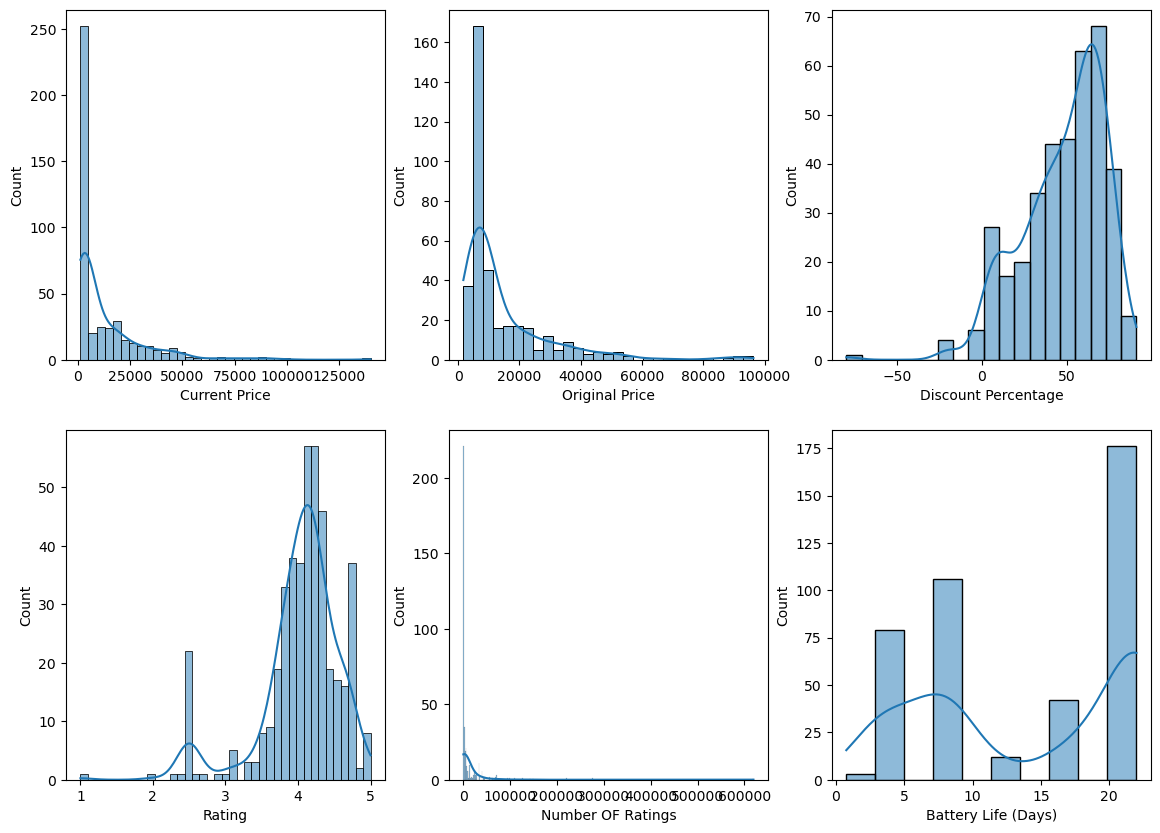

In [35]:
fig, axes = plt.subplots(nrows = 2,ncols = 3, figsize = (14,10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data = train_df[colum], ax = ax, kde = True )
    
plt.show()   

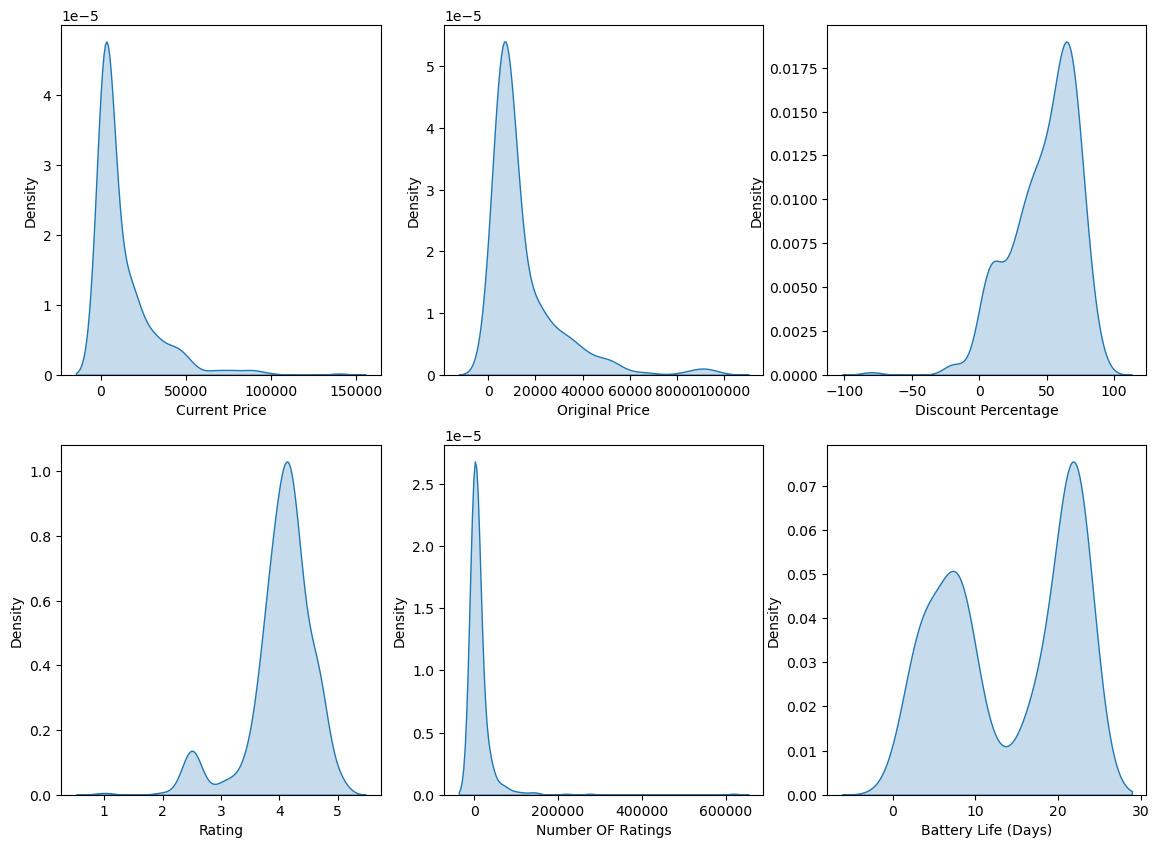

In [36]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data = train_df[colum], ax = ax, fill = True)
    
plt.show()    

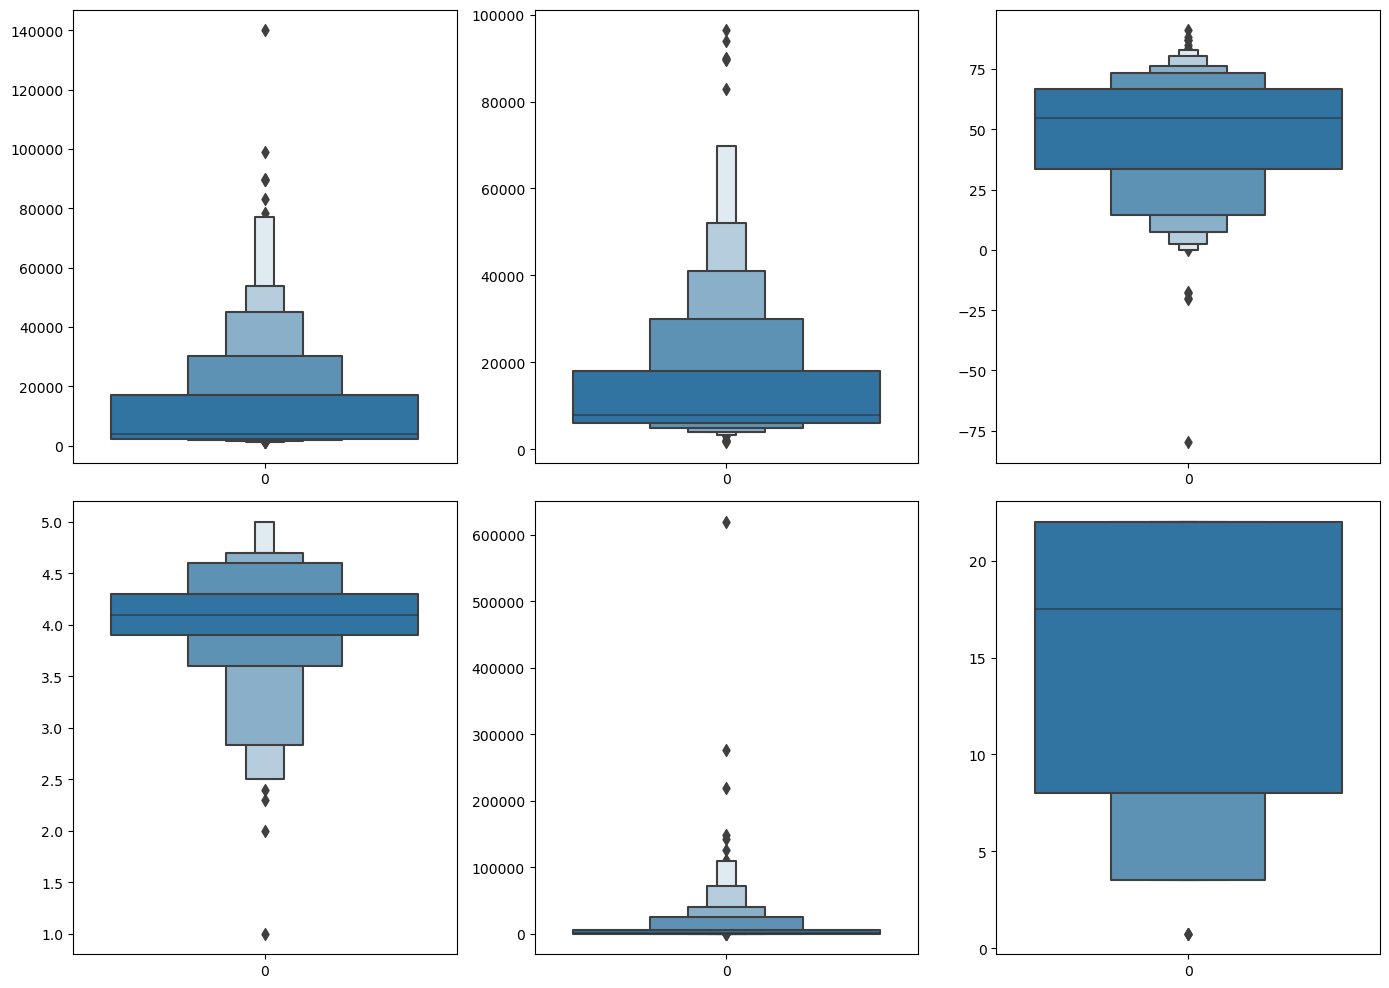

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxenplot(data = train_df[colum], ax = ax)
    
fig.tight_layout()
plt.show()    

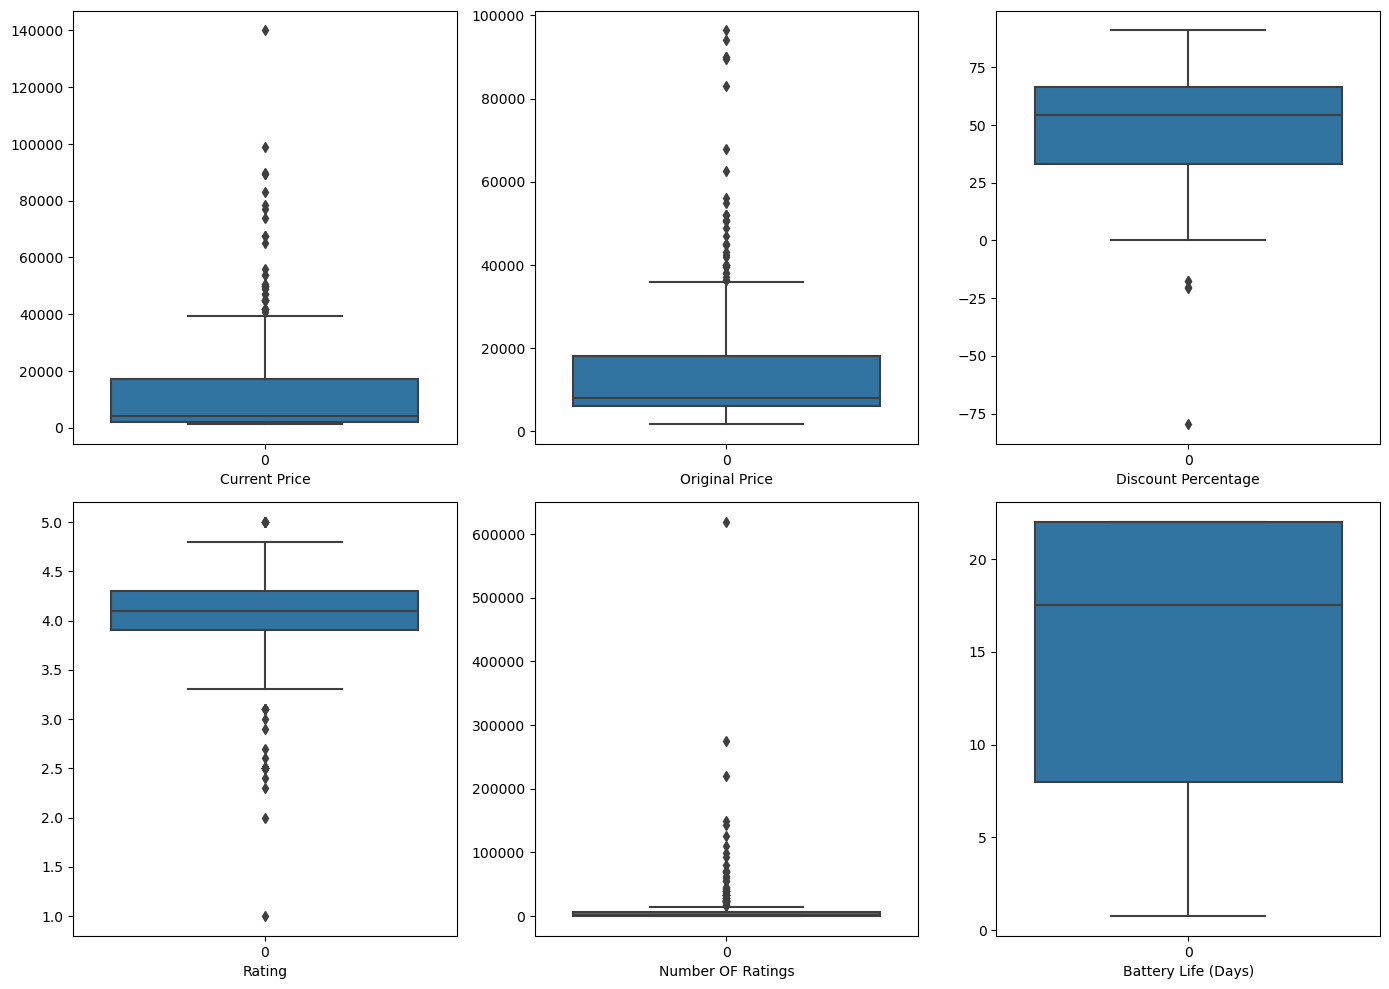

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 10))

for i , colum in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data = train_df[colum], ax = ax)
    ax.set_xlabel(colum)
    
fig.tight_layout()
plt.show()    

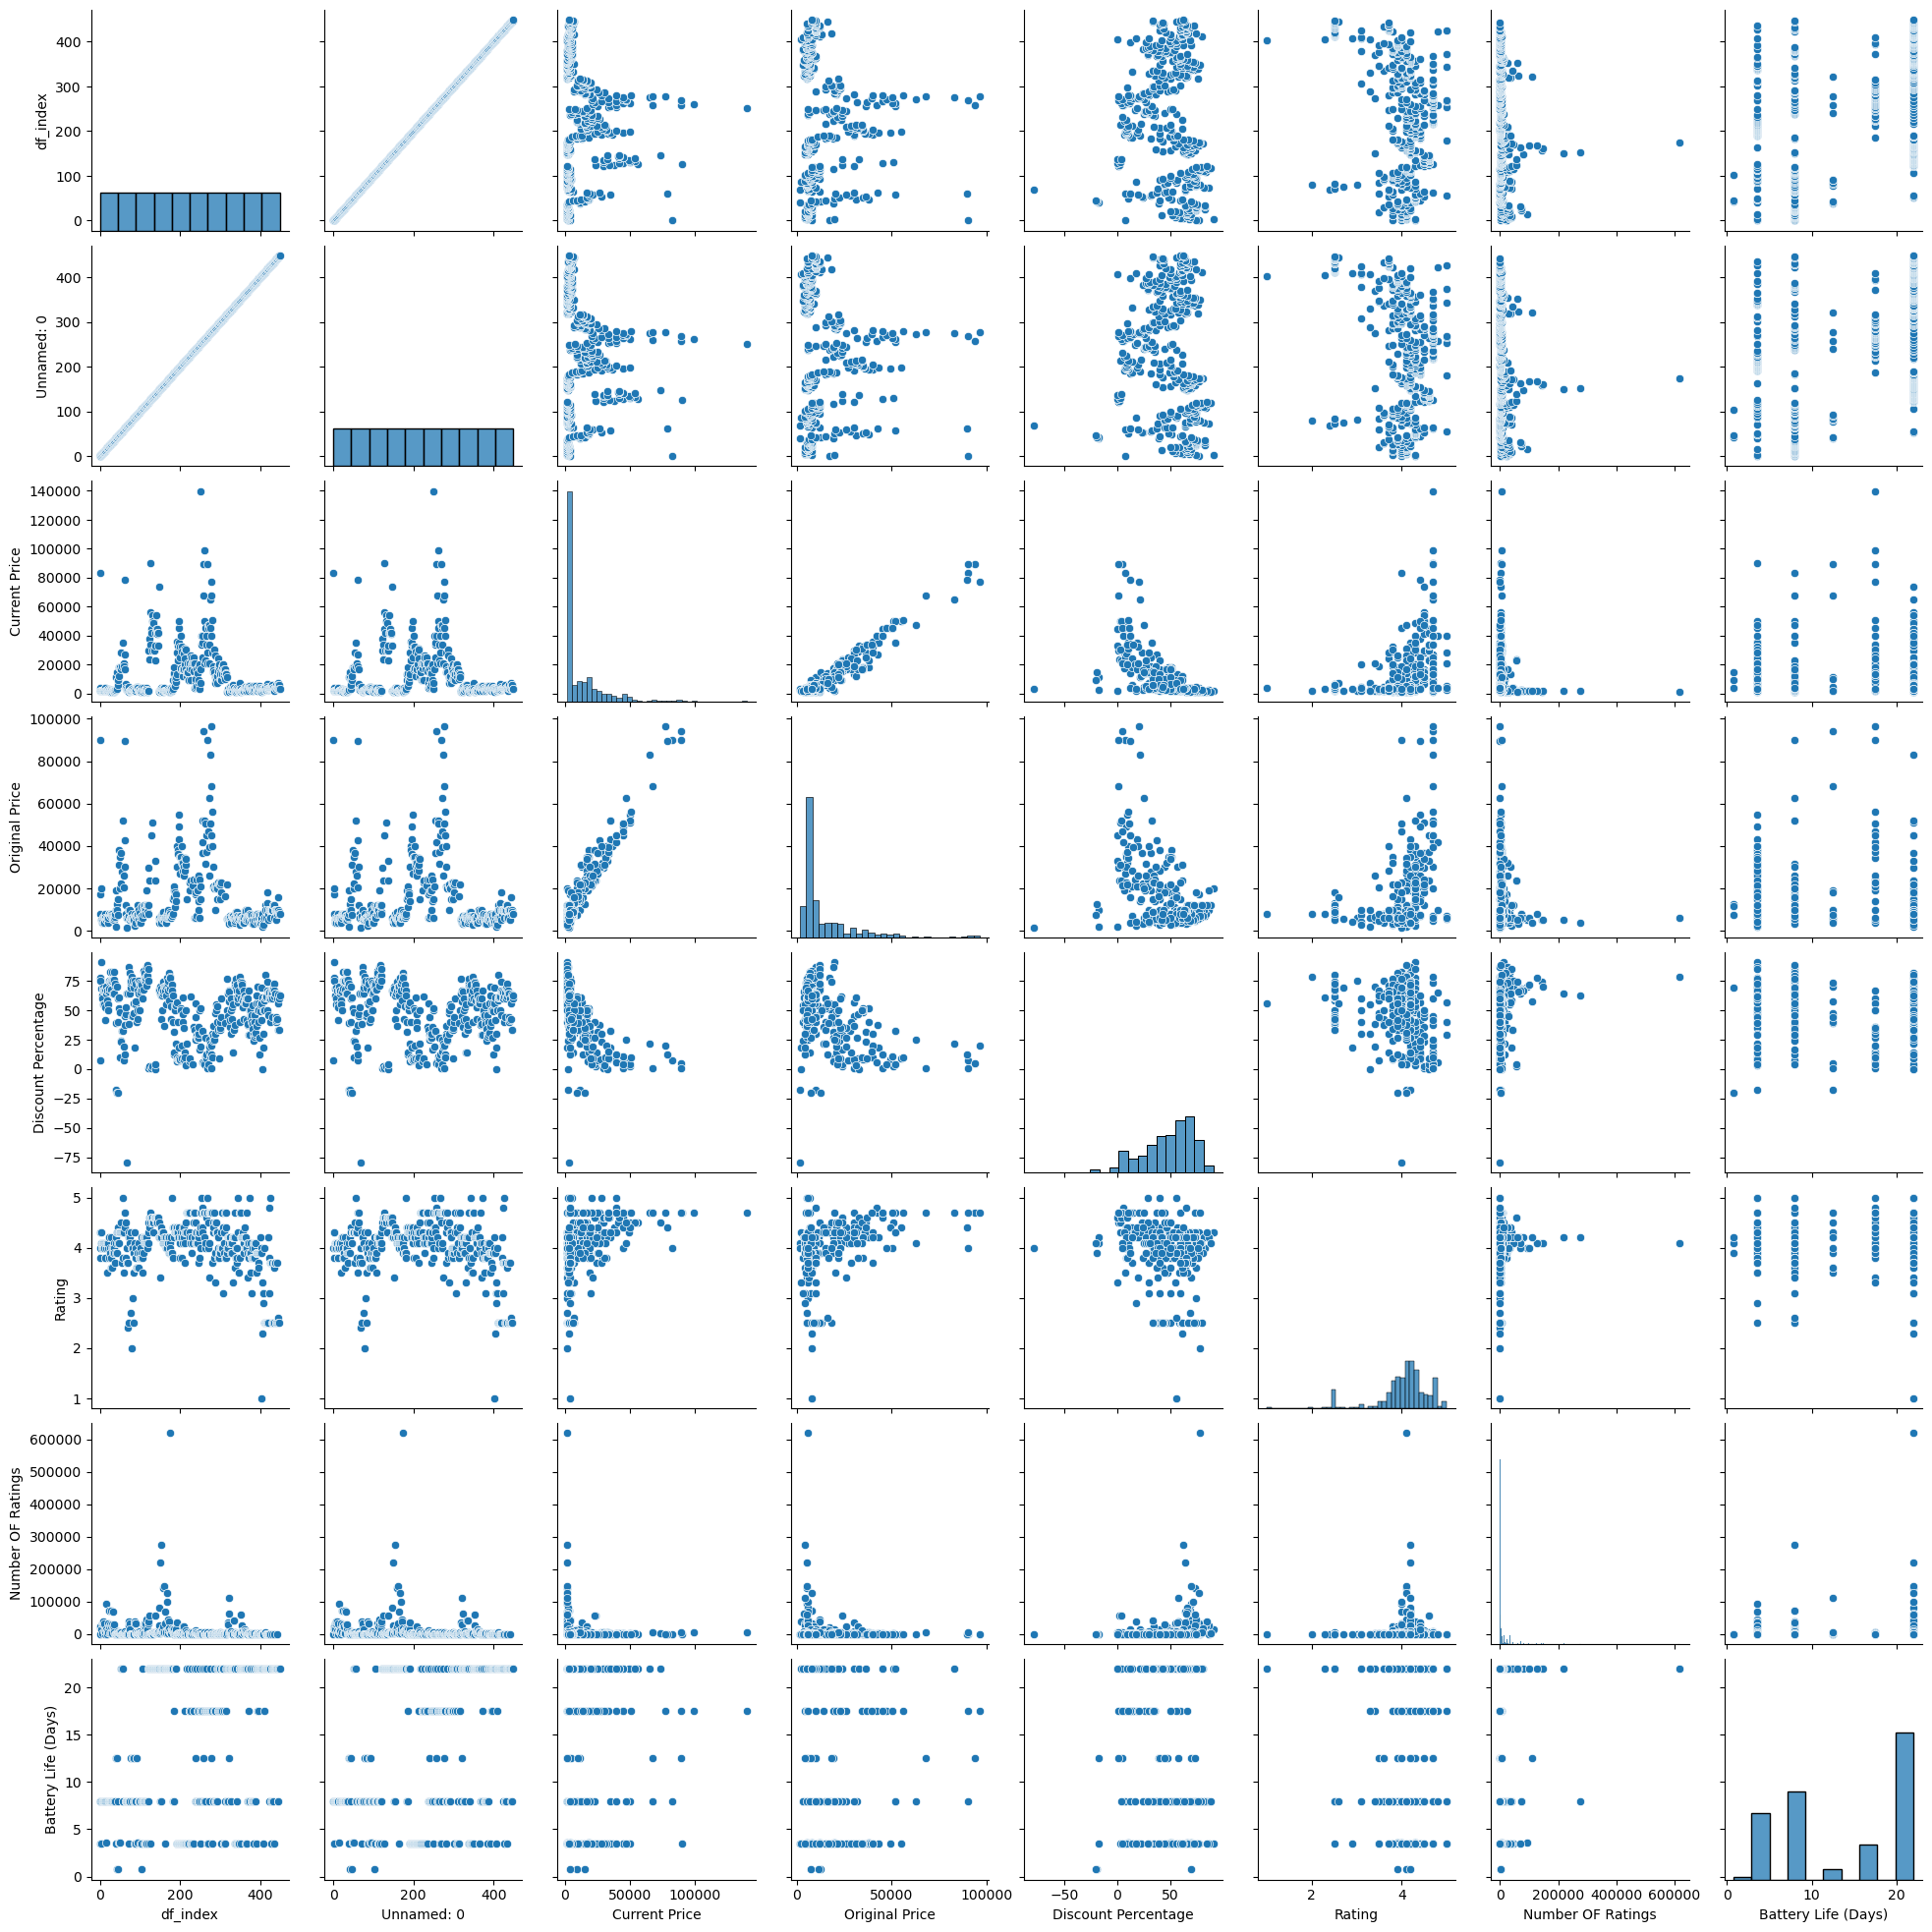

In [39]:
sns.pairplot(train_df)

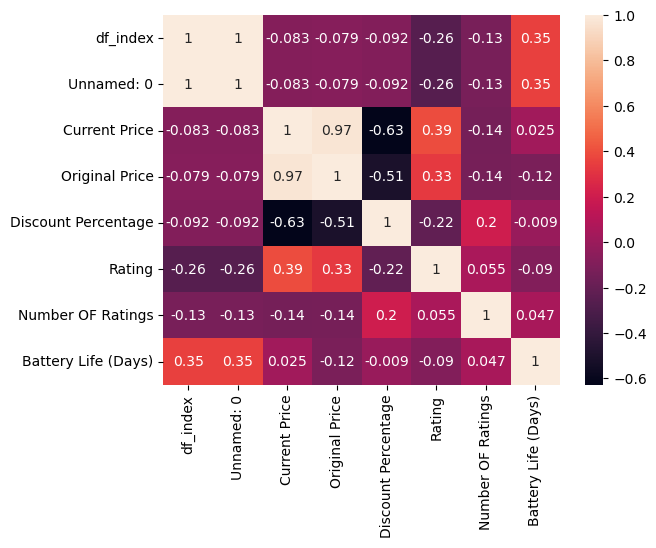

In [40]:
sns.heatmap(train_df.corr(numeric_only = True), annot = True)
plt.show()

# Feature Engineering 

In [41]:
train_df.drop(['df_index', 'Unnamed: 0'], axis = 1, inplace = True )

In [42]:
train_df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [43]:
train_df['Display Size'].isna().sum()

30

In [44]:
train_df['Display Size'].value_counts().count()

40

In [45]:
train_df['Display Size'].value_counts()

1.7 inches     68
1.3 inches     64
1.8 inches     60
1.4 inches     43
0.1 inches     36
1.6 inches     28
1.9 inches     26
1.2 inches     20
1.1 inches      7
0.2 inches      7
1.5 inches      7
4.3 inches      6
0.9 inches      6
4.4 inches      5
1.0 inches      4
0.8 inches      2
35.9 inches     2
2.0 inches      2
3.5 inches      2
4.5 inches      2
2.7 inches      2
20.0 inches     2
3.3 inches      2
2.1 inches      1
45.0 inches     1
30.0 inches     1
0.0 inches      1
6.9 inches      1
4.2 inches      1
2.3 inches      1
33.0 inches     1
18.5 inches     1
27.9 inches     1
0.5 inches      1
3.0 inches      1
15.9 inches     1
0.6 inches      1
4.6 inches      1
4.0 inches      1
2.4 inches      1
Name: Display Size, dtype: int64

In [46]:
train_df['Display Size'].fillna('0.0 inches', inplace = True)

In [47]:
train_df['Display Size'].isna().sum()

0

In [48]:
"0.0 inches".split() # example

['0.0', 'inches']

In [49]:
float("0.0 inches".split()[0]) # example

0.0

In [50]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [51]:
train_df["Display Size"].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [52]:
train_df['Display Size'].replace(0.0, np.nan, inplace = True)

In [53]:
train_df['Display Size'].isna().sum()

31

In [54]:
train_df['Weight'].head()

0    35 - 50 g
1    50 - 75 g
2    35 - 50 g
3        75g +
4    35 - 50 g
Name: Weight, dtype: object

In [55]:
train_df['Weight'].value_counts()

20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: Weight, dtype: int64

In [56]:
re.findall('\d+', '20 - 35 g')

['20', '35']

In [57]:
cal = sum([int(x) for x in re.findall('\d+','20 - 35 g' )]) / 2
cal

27.5

In [58]:
train_df['Weight'].replace('20 - 35 g', cal, inplace = True)

In [59]:
train_df['Weight'].value_counts()

27.5         80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: Weight, dtype: int64

In [60]:
cal = sum([int(x) for x in re.findall('\d+', "35 - 50 g")]) / 2
train_df['Weight'].replace('35 - 50 g', cal , inplace = True)

In [61]:
train_df['Weight'].value_counts()

27.5         80
75g +        66
42.5         58
<= 20 g      43
50 - 75 g    17
Name: Weight, dtype: int64

In [62]:
cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train_df['Weight'].replace('50 - 75 g', cal, inplace = True)

In [63]:
train_df['Weight'].value_counts()

27.5       80
75g +      66
42.5       58
<= 20 g    43
62.5       17
Name: Weight, dtype: int64

In [64]:
train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]), inplace = True)

In [65]:
train_df['Weight'].value_counts()

27.5       80
75.0       66
42.5       58
<= 20 g    43
62.5       17
Name: Weight, dtype: int64

In [66]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+','<= 20 g')[0]), inplace = True)

In [67]:
train_df['Weight'].value_counts()

27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: Weight, dtype: int64

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [69]:
train_df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

   Display Size  Weight  
0           NaN    42.5  
1           1.8    62.5  
2           1.7    42.5  
3           1.8    75.0  
4           1.7    42.5

In [70]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df["Discount Percentage"])) / 100

In [71]:
train_df.drop(["Discount Percentage"], axis = 1, inplace = True)

# Numerical Data

In [72]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == "float64"]

In [73]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [74]:
train_df[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
0        82990.0         89900.0     4.0               65.0   
1         3799.0         16999.0     4.3            20788.0   
2         1999.0          7990.0     3.8            21724.0   
3         1799.0         19999.0     4.3            13244.0   
4         1599.0          4999.0     4.1            13901.0   

   Battery Life (Days)  Display Size  Weight  Discount Price  
0                  8.0           NaN    42.5    -6910.000000  
1                  3.5           1.8    62.5   -13200.000001  
2                  8.0           1.7    42.5    -5991.000000  
3                  3.5           1.8    75.0   -18200.000000  
4                  8.0           1.7    42.5    -3400.000000

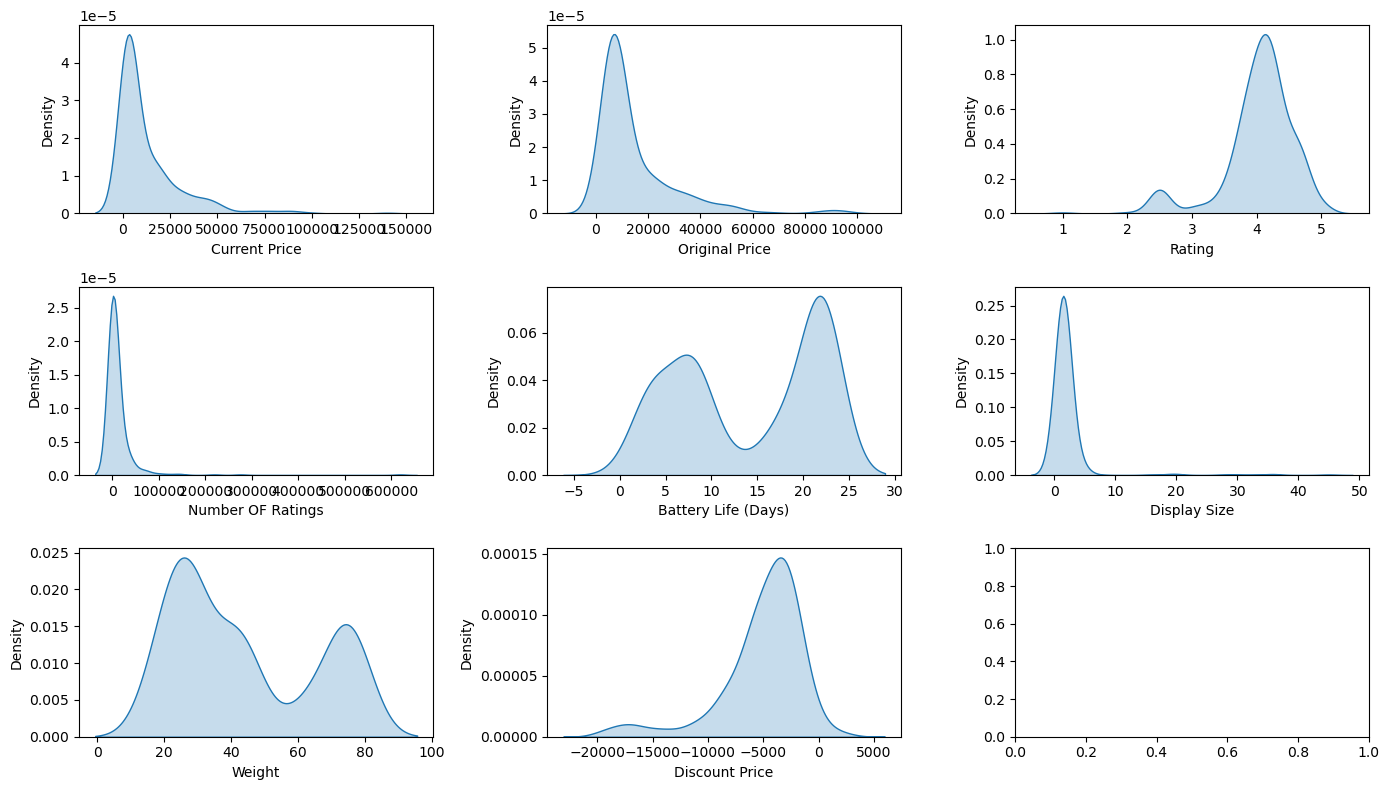

In [75]:
fig , axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14,8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.kdeplot(data = train_df[colum], ax = ax, fill = True)

fig.tight_layout()    
plt.show()    

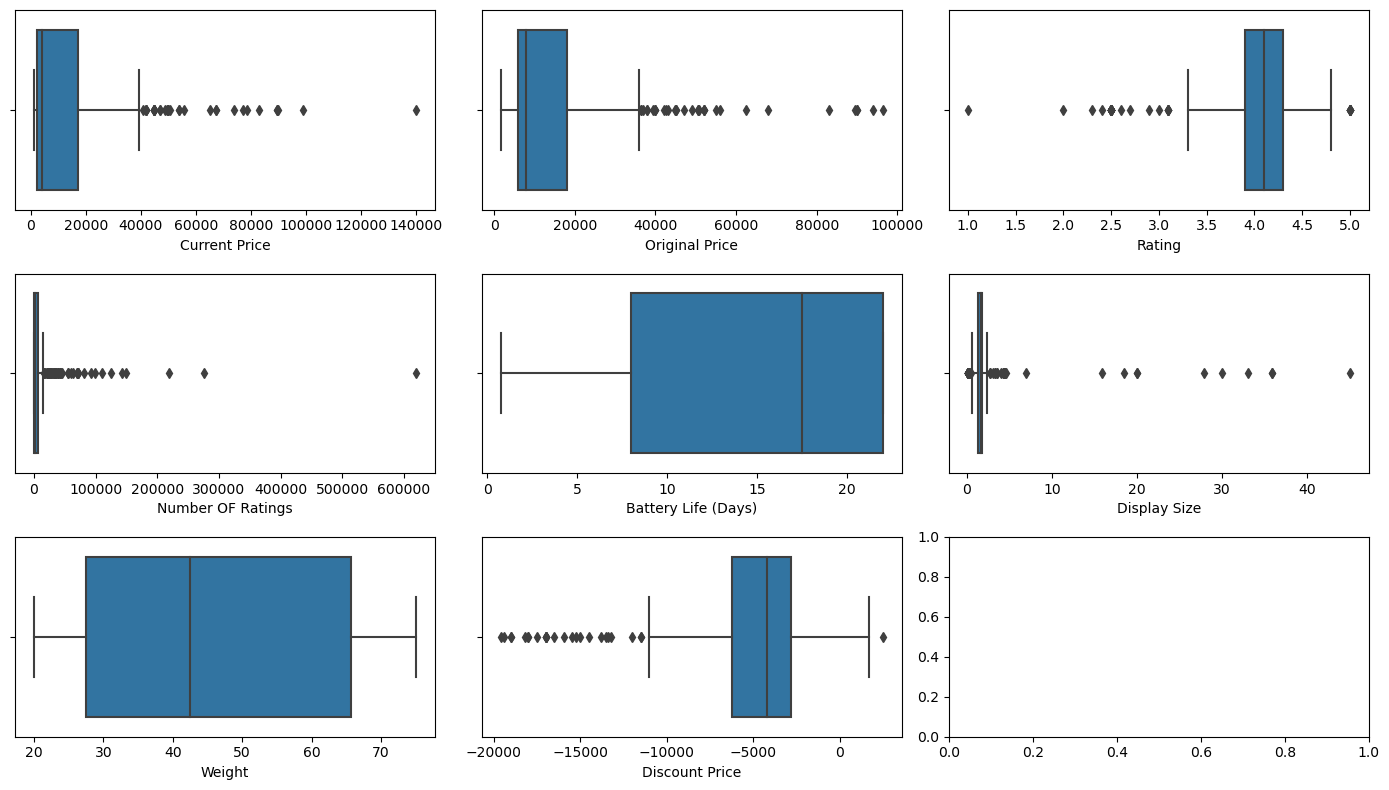

In [76]:
fig , axes = plt.subplots(nrows = 3, ncols = 3, figsize = (14,8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x = train_df[colum], ax = ax)

fig.tight_layout()
plt.show()

In [77]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3= data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [78]:
train_df.shape

(450, 15)

In [79]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [80]:
import_col = ['Current Price','Original Price', 'Rating',
       'Number OF Ratings','Display Size']

In [81]:
for col in import_col:
    train_df = remove_outliers_IQR(train_df, col)
    

In [82]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(), inplace = True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [83]:
train_df[numerical_col].isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [84]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [85]:
train_df.shape

(181, 15)

In [86]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [87]:
train_df.head()

Brand  Current Price  Original Price  Rating  Number OF Ratings  \
1  fire-boltt         3799.0         16999.0     4.3            20788.0   
2        boat         1999.0          7990.0     3.8            21724.0   
3  fire-boltt         1799.0         19999.0     4.3            13244.0   
4       noise         1599.0          4999.0     4.1            13901.0   
5       noise         1499.0          3999.0     4.0            32704.0   

                               Model Name Dial Shape Strap Color  \
1                                  BSW046        NaN         NaN   
2                               Wave Call        NaN         NaN   
3                                  BSW053        NaN         NaN   
4  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
5                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen  Battery Life (Days) Bluetooth  Display Size  \
1        Silicon         Yes                  3.5       Yes           1.8   
2        Silicon         Yes                  8.0       Yes           1.7   
3        Silicon         Yes                  3.5       Yes           1.8   
4          Other         Yes                  8.0       Yes           1.7   
5          Other         Yes                  8.0       Yes           1.7   

   Weight  Discount Price  
1    62.5   -13200.000001  
2    42.5    -5991.000000  
3    75.0   -18200.000000  
4    42.5    -3400.000000  
5    42.5    -2500.000000

In [88]:
train_df[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
1         3799.0         16999.0     4.3            20788.0   
2         1999.0          7990.0     3.8            21724.0   
3         1799.0         19999.0     4.3            13244.0   
4         1599.0          4999.0     4.1            13901.0   
5         1499.0          3999.0     4.0            32704.0   

   Battery Life (Days)  Display Size  Weight  Discount Price  
1                  3.5           1.8    62.5   -13200.000001  
2                  8.0           1.7    42.5    -5991.000000  
3                  3.5           1.8    75.0   -18200.000000  
4                  8.0           1.7    42.5    -3400.000000  
5                  8.0           1.7    42.5    -2500.000000

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [92]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [93]:
data = pd.DataFrame(data, columns = numerical_col[:-1])

In [94]:
data.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.615385  0.772727  
1             0.341176      0.538462  0.409091  
2             0.129412      0.615385  1.000000  
3             0.341176      0.538462  0.409091  
4             0.341176      0.538462  0.409091

In [95]:
pd.concat([train_df.reset_index(), data],axis = 1).shape

(181, 23)

In [96]:
train_df = pd.concat([train_df.reset_index(), data],axis = 1)

In [97]:
train_df.isna().sum()

index                   0
Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [98]:
data.shape, train_df.shape

((181, 7), (181, 23))

In [99]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [100]:
train_df.drop(numerical_col[:-1], axis = 1, inplace = True)

In [101]:
train_df.head()

index       Brand                              Model Name Dial Shape  \
0      1  fire-boltt                                  BSW046        NaN   
1      2        boat                               Wave Call        NaN   
2      3  fire-boltt                                  BSW053        NaN   
3      4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4      5       noise                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  Discount Price  
0         NaN        Silicon         Yes       Yes   -13200.000001  
1         NaN        Silicon         Yes       Yes    -5991.000000  
2         NaN        Silicon         Yes       Yes   -18200.000000  
3         NaN          Other         Yes       Yes    -3400.000000  
4         NaN          Other         Yes       Yes    -2500.000000

In [102]:
train_df = pd.concat([train_df, data], axis = 1)

In [103]:
train_df.head()

index       Brand                              Model Name Dial Shape  \
0      1  fire-boltt                                  BSW046        NaN   
1      2        boat                               Wave Call        NaN   
2      3  fire-boltt                                  BSW053        NaN   
3      4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4      5       noise                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  Discount Price  \
0         NaN        Silicon         Yes       Yes   -13200.000001   
1         NaN        Silicon         Yes       Yes    -5991.000000   
2         NaN        Silicon         Yes       Yes   -18200.000000   
3         NaN          Other         Yes       Yes    -3400.000000   
4         NaN          Other         Yes       Yes    -2500.000000   

   Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.615385  0.772727  
1             0.341176      0.538462  0.409091  
2             0.129412      0.615385  1.000000  
3             0.341176      0.538462  0.409091  
4             0.341176      0.538462  0.409091

In [104]:
train_df[numerical_col]

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.111631        0.568365  0.833333           0.622082   
1         0.034348        0.229960  0.416667           0.650096   
2         0.025761        0.681053  0.833333           0.396295   
3         0.017174        0.117609  0.666667           0.415958   
4         0.012881        0.080047  0.583333           0.978720   
..             ...             ...       ...                ...   
176       0.184621        0.211517  0.500000           0.000569   
177       0.068696        0.136391  0.500000           0.000569   
178       0.029969        0.001164  0.000000           0.000030   
179       0.120218        0.305424  0.333333           0.000000   
180       0.120218        0.305424  0.333333           0.000090   

     Battery Life (Days)  Display Size    Weight  Discount Price  
0               0.129412      0.615385  0.772727   -13200.000001  
1               0.341176      0.538462  0.409091    -5991.000000  
2               0.129412      0.615385  1.000000   -18200.000000  
3               0.341176      0.538462  0.409091    -3400.000000  
4               0.341176      0.538462  0.409091    -2500.000000  
..                   ...           ...       ...             ...  
176             1.000000      0.615385  0.409091    -2000.000000  
177             1.000000      0.538462  0.409091    -2700.000000  
178             1.000000      1.000000  0.409091       -2.000000  
179             1.000000      0.538462  0.409091    -6000.000000  
180             1.000000      0.538462  0.409091    -6000.000000  

[181 rows x 8 columns]

# Categorical Columns

In [105]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [106]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [107]:
train_df.shape

(181, 16)

In [108]:
train_df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
0  fire-boltt                                  BSW046        NaN         NaN   
1        boat                               Wave Call        NaN         NaN   
2  fire-boltt                                  BSW053        NaN         NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
4       noise                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen Bluetooth  
0        Silicon         Yes       Yes  
1        Silicon         Yes       Yes  
2        Silicon         Yes       Yes  
3          Other         Yes       Yes  
4          Other         Yes       Yes

In [109]:
train_df['Touchscreen'].value_counts()

Yes    174
No       1
Name: Touchscreen, dtype: int64

In [110]:
train_df['Bluetooth'].value_counts()

Yes    181
Name: Bluetooth, dtype: int64

In [111]:
categorical_col.remove('Bluetooth')

In [112]:
from scipy.stats import f_oneway

In [113]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ": ", 'P-Value for anova is : ', AnovaResults[1])

Brand :  P-Value for anova is :  8.421850586222326e-14
Model Name :  P-Value for anova is :  4.263744302000662e-05
Dial Shape :  P-Value for anova is :  0.0001236872758889996
Strap Color :  P-Value for anova is :  0.06574836943894026
Strap Material :  P-Value for anova is :  0.00039800860157354883
Touchscreen :  P-Value for anova is :  0.9803878528536762


In [114]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']

In [115]:
train_df[imp_col].head()

Brand                              Model Name Dial Shape  \
0  fire-boltt                                  BSW046        NaN   
1        boat                               Wave Call        NaN   
2  fire-boltt                                  BSW053        NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4       noise                                  NSW-05        NaN   

  Strap Material  
0        Silicon  
1        Silicon  
2        Silicon  
3          Other  
4          Other

In [116]:
for col in imp_col:
    train_df[col].fillna('other', inplace = True)

In [117]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [118]:
pd.get_dummies(train_df['Brand'])

amazfit  ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  \
0          0        0     0           0     0           1       0       0   
1          0        0     1           0     0           0       0       0   
2          0        0     0           0     0           1       0       0   
3          0        0     0           0     0           0       0       0   
4          0        0     0           0     0           0       0       0   
..       ...      ...   ...         ...   ...         ...     ...     ...   
176        0        0     0           0     0           0       0       0   
177        0        0     0           0     0           0       0       0   
178        0        0     0           0     0           0       0       0   
179        0        0     0           0     0           1       0       0   
180        0        0     0           0     0           1       0       0   

     garmin  gizmore  hammer  honor  huawei  noise  pebble  samsung  zebronics  
0         0        0       0      0       0      0       0        0          0  
1         0        0       0      0       0      0       0        0          0  
2         0        0       0      0       0      0       0        0          0  
3         0        0       0      0       0      1       0        0          0  
4         0        0       0      0       0      1       0        0          0  
..      ...      ...     ...    ...     ...    ...     ...      ...        ...  
176       0        0       0      0       0      0       0        0          1  
177       0        0       0      0       0      0       0        0          1  
178       0        0       0      0       0      0       0        0          1  
179       0        0       0      0       0      0       0        0          0  
180       0        0       0      0       0      0       0        0          0  

[181 rows x 17 columns]

In [119]:
brand = pd.get_dummies(train_df['Brand'], drop_first = True )

In [120]:
model_name  = pd.get_dummies(train_df['Model Name']).drop(['other'], axis = 1)

In [121]:
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'], axis = 1 )

In [122]:
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'], axis = 1 )

In [123]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis = 1)

In [124]:
imp_df.head()

ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  garmin  \
0        0     0           0     0           1       0       0       0   
1        0     1           0     0           0       0       0       0   
2        0     0           0     0           1       0       0       0   
3        0     0           0     0           0       0       0       0   
4        0     0           0     0           0       0       0       0   

   gizmore  hammer  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
0        0       0  ...        0      0      0      0        0       0   
1        0       0  ...        0      0      0      0        0       0   
2        0       0  ...        0      0      0      0        0       0   
3        0       0  ...        0      0      0      1        0       0   
4        0       0  ...        0      0      0      1        0       0   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0        1                0          0                            0  
1        1                0          0                            0  
2        1                0          0                            0  
3        0                0          0                            0  
4        0                0          0                            0  

[5 rows x 193 columns]

In [125]:
new_df = pd.concat([train_df[numerical_col], imp_df], axis = 1)

In [126]:
new_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  boat  \
0             0.129412      0.615385  0.772727   -13200.000001        0     0   
1             0.341176      0.538462  0.409091    -5991.000000        0     1   
2             0.129412      0.615385  1.000000   -18200.000000        0     0   
3             0.341176      0.538462  0.409091    -3400.000000        0     0   
4             0.341176      0.538462  0.409091    -2500.000000        0     0   

   ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0  ...        0      0      0      0        0       0        1   
1  ...        0      0      0      0        0       0        1   
2  ...        0      0      0      0        0       0        1   
3  ...        0      0      0      1        0       0        0   
4  ...        0      0      0      1        0       0        0   

   Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                0          0                            0  
1                0          0                            0  
2                0          0                            0  
3                0          0                            0  
4                0          0                            0  

[5 rows x 201 columns]

In [127]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 201, dtype: int64

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [129]:
new_df

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.111631        0.568365  0.833333           0.622082   
1         0.034348        0.229960  0.416667           0.650096   
2         0.025761        0.681053  0.833333           0.396295   
3         0.017174        0.117609  0.666667           0.415958   
4         0.012881        0.080047  0.583333           0.978720   
..             ...             ...       ...                ...   
176       0.184621        0.211517  0.500000           0.000569   
177       0.068696        0.136391  0.500000           0.000569   
178       0.029969        0.001164  0.000000           0.000030   
179       0.120218        0.305424  0.333333           0.000000   
180       0.120218        0.305424  0.333333           0.000090   

     Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  \
0               0.129412      0.615385  0.772727   -13200.000001        0   
1               0.341176      0.538462  0.409091    -5991.000000        0   
2               0.129412      0.615385  1.000000   -18200.000000        0   
3               0.341176      0.538462  0.409091    -3400.000000        0   
4               0.341176      0.538462  0.409091    -2500.000000        0   
..                   ...           ...       ...             ...      ...   
176             1.000000      0.615385  0.409091    -2000.000000        0   
177             1.000000      0.538462  0.409091    -2700.000000        0   
178             1.000000      1.000000  0.409091       -2.000000        0   
179             1.000000      0.538462  0.409091    -6000.000000        0   
180             1.000000      0.538462  0.409091    -6000.000000        0   

     boat  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0       0  ...        0      0      0      0        0       0        1   
1       1  ...        0      0      0      0        0       0        1   
2       0  ...        0      0      0      0        0       0        1   
3       0  ...        0      0      0      1        0       0        0   
4       0  ...        0      0      0      1        0       0        0   
..    ...  ...      ...    ...    ...    ...      ...     ...      ...   
176     0  ...        0      0      0      0        0       0        1   
177     0  ...        0      0      0      0        0       1        0   
178     0  ...        0      0      0      0        0       0        1   
179     0  ...        0      0      0      0        0       0        1   
180     0  ...        0      0      0      0        0       1        0   

     Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                  0          0                            0  
1                  0          0                            0  
2                  0          0                            0  
3                  0          0                            0  
4                  0          0                            0  
..               ...        ...                          ...  
176                0          0                            0  
177                0          0                            0  
178                0          0                            0  
179                0          0                            0  
180                0          0                            0  

[181 rows x 201 columns]

In [130]:
new_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  boat  \
0             0.129412      0.615385  0.772727   -13200.000001        0     0   
1             0.341176      0.538462  0.409091    -5991.000000        0     1   
2             0.129412      0.615385  1.000000   -18200.000000        0     0   
3             0.341176      0.538462  0.409091    -3400.000000        0     0   
4             0.341176      0.538462  0.409091    -2500.000000        0     0   

   ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0  ...        0      0      0      0        0       0        1   
1  ...        0      0      0      0        0       0        1   
2  ...        0      0      0      0        0       0        1   
3  ...        0      0      0      1        0       0        0   
4  ...        0      0      0      1        0       0        0   

   Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                0          0                            0  
1                0          0                            0  
2                0          0                            0  
3                0          0                            0  
4                0          0                            0  

[5 rows x 201 columns]

In [131]:
y = new_df['Discount Price']

In [132]:
y

0     -13200.000001
1      -5991.000000
2     -18200.000000
3      -3400.000000
4      -2500.000000
           ...     
176    -2000.000000
177    -2700.000000
178       -2.000000
179    -6000.000000
180    -6000.000000
Name: Discount Price, Length: 181, dtype: float64

In [133]:
X = new_df.drop('Discount Price', axis = 1)

In [134]:
# 80% training
# 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr_model = LinearRegression()

In [136]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


res = r2_score(y_test, y_pred)
print(res)

-117.42997273388795


In [137]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.7265606721666313


In [138]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.5790280750473484


In [139]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [140]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.6958960389142593


In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, X,y ,cv=5, scoring = 'r2')

print('cross_val_score:', score, score.mean(), score.std())

0.8163342574754942
cross_val_score: [ 0.45187936  0.39051559  0.04093348  0.0898886  -0.5060673 ] 0.0934299454110222 0.3402679019622692


In [143]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)
score = cross_val_score(rf_model, X,y ,cv=5, scoring = 'r2')

print('cross_val_score:', score, score.mean(), score.std())

0.5784003348880268
cross_val_score: [0.46653732 0.7448987  0.45427539 0.61211842 0.70887487] 0.5973409410903997 0.1200073505397314


In [144]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, X,y ,cv=5, scoring = 'r2')

print('cross_val_score:', score, score.mean(), score.std())

0.6958960389142593
cross_val_score: [0.71687457 0.85160856 0.65360352 0.52677189 0.59881393] 0.6695344907745989 0.11047932405115413


In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7460260949741991


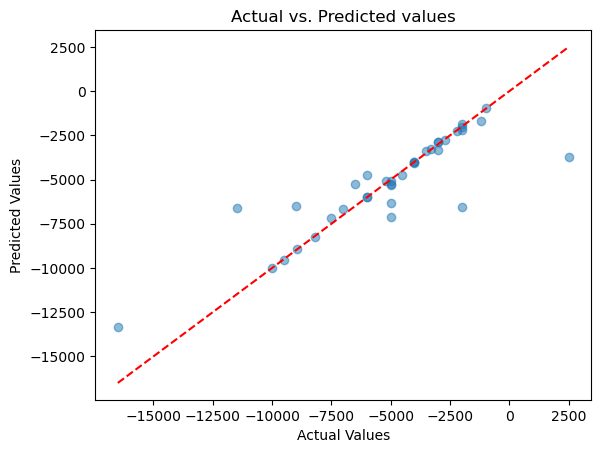

In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, alpha = 0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle = '--')

plt.xlabel("Actual Values")
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted values')
plt.show()

In [148]:
import pickle

In [149]:
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [150]:
with open('model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [151]:
y_pred = xgb_model.predict(X_test)
print(r2_score(y_test, y_test))

1.0
